In [44]:
#引入lambda函數，將python上的function包裝成keras上的layer
from keras.layers.core import Lambda
from keras import backend as K

from keras.models import Model
from keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def average_function(input):
    return K.mean(input,axis=1)

In [21]:
#函式不接受numpy array的類型輸入，因此average_function(np.array([1,3]))不成立
average_layer = Lambda(average_function)
print(average_layer)

In [22]:
#接受四維向量，輸出一維向量
inputSize = 4

x = Input(shape=(inputSize,))
y = average_layer(x)
average_model = Model(x,y)

In [23]:
average_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
lambda_4 (Lambda)            (None,)                   0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [24]:
average_model.compile(loss='mse',optimizer='sgd')

In [26]:
#兩個[]告訴機器是1筆4維的向量
np.array([[1,2,3,4]]).shape

(1, 4)

In [27]:
average_model.predict(np.array([[1,2,3,4]]))

array([2.5], dtype=float32)

In [28]:
average_model.predict(np.array([[1,2,3,4],[1,1,1,1]]))

array([2.5, 1. ], dtype=float32)

In [33]:
#具抽樣功能的神經網路層
sampling_dim = 2
def sampling(args):
    z_mean,z_log_var = args
    epsilon = K.random_normal(shape=(sampling_dim,),mean=0,stddev=1)
    return z_mean + K.exp(z_log_var/2) * epsilon

In [34]:
sample_layer = Lambda(sampling,output_shape=(sampling_dim,))

In [35]:
m = Input(shape=(sampling_dim,))
s = Input(shape=(sampling_dim,))
#因為lambda不是那麼標準的神經網路層，可接受序列餵入
z = sample_layer([m,s])

sample_model = Model([m,s],z)

In [36]:
sample_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
lambda_6 (Lambda)               (None, 2)            0           input_6[0][0]                    
                                                                 input_7[0][0]                    
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________


In [38]:
test_mean = np.random.randint(10,size=sampling_dim).reshape(1,2)
test_log_var = np.array([[0,0]])

print("平均為 (%d,%d)" %(test_mean[0][0],test_mean[0][1]))

平均為 (4,3)


In [39]:
sample_model.predict([test_mean,test_log_var])

array([[4.734972, 1.586167]], dtype=float32)

In [40]:
num_of_samples = 100
np_sample = np.random.multivariate_normal(test_mean[0],np.identity(2),size=num_of_samples)

In [42]:
keras_sample = np.zeros((num_of_samples,2))
for i in range(num_of_samples):
    keras_sample[i]=sample_model.predict([test_mean,test_log_var])

Text(0.5, 1.0, 'Normal Random Samples using Keras/Numpy')

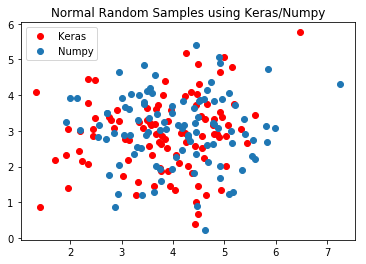

In [45]:
plt.plot(keras_sample[:,0],keras_sample[:,1],'ro')
plt.plot(np_sample[:,0],np_sample[:,1],'o')
plt.legend(['Keras','Numpy'])
plt.title('Normal Random Samples using Keras/Numpy')